# Regression

What is 'Regression'?
<br>Regression is a statistical measure used in finance, investing and other disciplines that attempts to determine the strength of the relationship between one dependent variable (usually denoted by Y) and a series of other changing variables (known as independent variables).
<br><b>Linear Regression
<br>Multivariate Regression
<br>Logistic Regression</b>


What is Linear Regression?

Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables. 
<br> X is our Feature Vector
<br> Y is our Response Vector
<br> m is the no of examples in our training set
<br> n is the no of features 

Three major uses for regression analysis are (1) determining the strength of predictors, (2) forecasting an effect, and (3) trend forecasting.

## Linear Regression

The major operations of Linear Regression are:
    <br>1.Calculate the hypothesis h
    <br>2.Calculate the loss
    <br>3.Calculate the Gradient
    <br>4.Update the parameters theta

For this problem lets take a training set stored in linearReg.txt file where column 1 has teh population of a city a while the second column is profit.
Your Task is to choose  a city where you could open  profitable business venture

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mbl
#reading the data
training_set=pd.read_csv('Data/LinearReg.txt',names=['x','y'])
print(training_set.head())
print(training_set.info())

        x        y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
x    97 non-null float64
y    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB
None


Now let us plot this data in a scatter plot

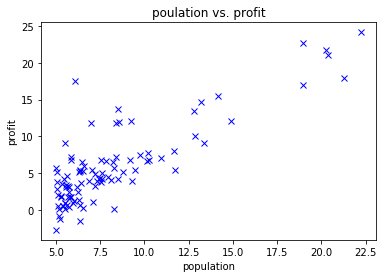

In [2]:
# x refers to the population size in 10,000s
# y refers to the profit in $10,000s
X=training_set.x
y=training_set.y
plt.figure()
plt.plot(X,y,'x',color='blue')
plt.xlabel('population')
plt.ylabel('profit')
plt.title('poulation vs. profit')
plt.show()

The task is to find a line which fits best in above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in dataset).This line is called regression line.

In [3]:
#adding the bias for the training set
bias=pd.Series(1,index=range(len(y)))
training_set['bias']=bias
training_set=training_set[['bias','x','y']]
X=np.array(training_set[['bias','x']])
y=np.array(training_set[['y']])


In [6]:
print(X.shape)
print(y.shape)
#initialising theta
theta = np.zeros((2, 1))
print(theta.shape)

(97, 2)
(97, 1)
(2, 1)


Computing cost

In [7]:
#function to calculate the cost
def cost(x,y,theta):
    m = y.size
    J = 0
    h = x.dot(theta)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return (J)

In [8]:
#the convergence constant that decides how fast Gradient descen will converge
alpha=0.01
#no of iterations that decides how long gradient descent will run
iterations=1500
J_history = np.zeros((iterations, 1))


<h1>Gradient Descent</h1>
<br>Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).
<br>The cost is calculated for a machine learning algorithm over the entire training dataset for each iteration of the gradient descent algorithm. One iteration of the algorithm is called one batch and this form of gradient descent is referred to as batch gradient descent.

In [9]:
#calculating gradient descent
def gradient(x,y,theta,iterations,alpha):
    m = y.size
    for i in np.arange(iterations):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[i] = cost(X, y, theta)
    return(theta, J_history)

Initial Cost: 32.072733877455676
Theta:  [-3.63029144  1.16636235]
Final Cost: 4.483388256587725


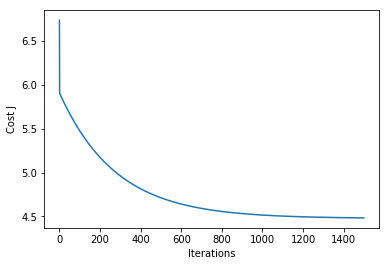

In [11]:
#getting the value of theta by running gradient descent
# theta for minimized cost J
print("Initial Cost:",cost(X,y,theta))
theta , Cost_J = gradient(X, y,theta,iterations,alpha)
print('Theta: ',theta.ravel())
print("Final Cost:",cost(X,y,theta))
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');


In [12]:
#predicting the values
ts=X[:,[1]]
for  i in range(len(ts)):
    y_predict=theta[0]+theta[1]*ts

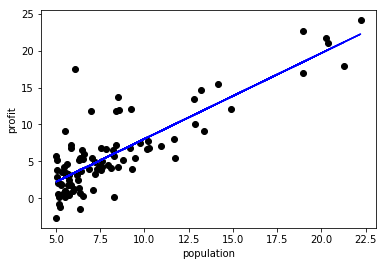

In [13]:
plt.figure()
plt.plot(ts,y,'o',color='black')
plt.plot(ts,y_predict,color='blue')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

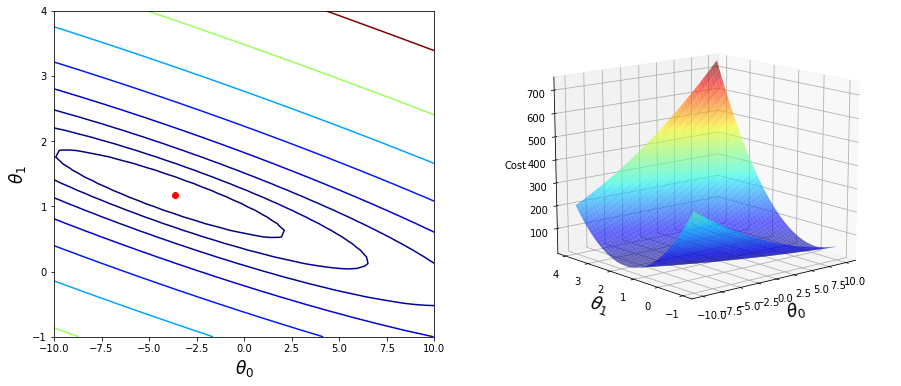

In [14]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = cost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

### Linear Regressiion using scikit-learn

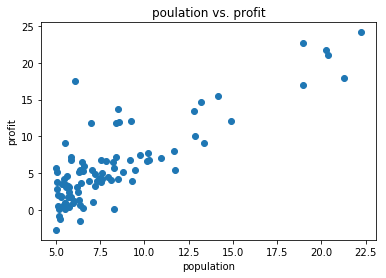

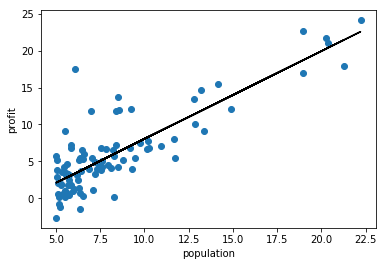

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

import pandas as pd
df=pd.read_csv('Data/LinearReg.txt',names=['x','y'])
x=pd.DataFrame(df,columns=['x'])
y=pd.DataFrame(df,columns=['y'])
#vizualizing the data
plt.figure()
plt.plot(x, y,'o')
plt.xlabel('population')
plt.ylabel('profit')
plt.title('poulation vs. profit')
plt.show()
#linear regression object
reg=linear_model.LinearRegression()
#training
reg.fit(x,y)
#making predictions
y_pred=reg.predict(x)
#viewing the regression line
plt.figure()
plt.plot(x, y,'o')
plt.xlabel('population')
plt.ylabel('profit')
plt.plot(x, y_pred, color='black')
plt.show()